### Q1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

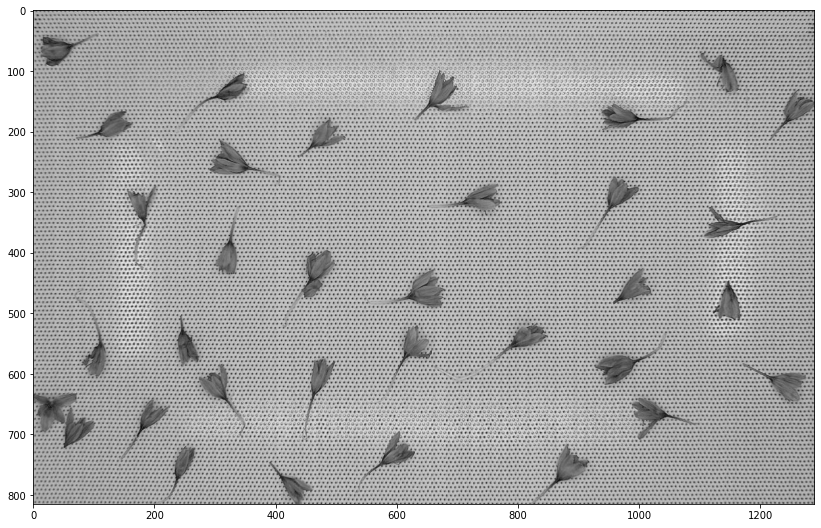

In [41]:
image = cv.imread("images/img_01.jpg",0)
plt.figure(figsize=(14,16))
plt.imshow(image, cmap='gray')
plt.show()


A

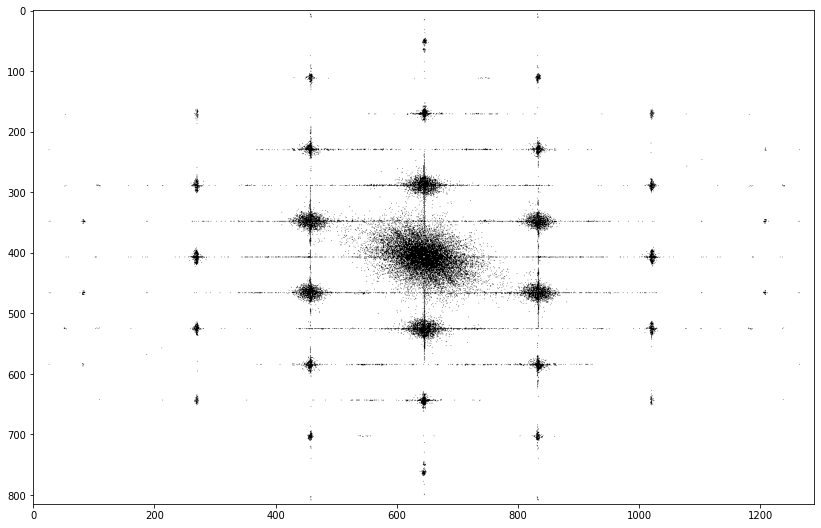

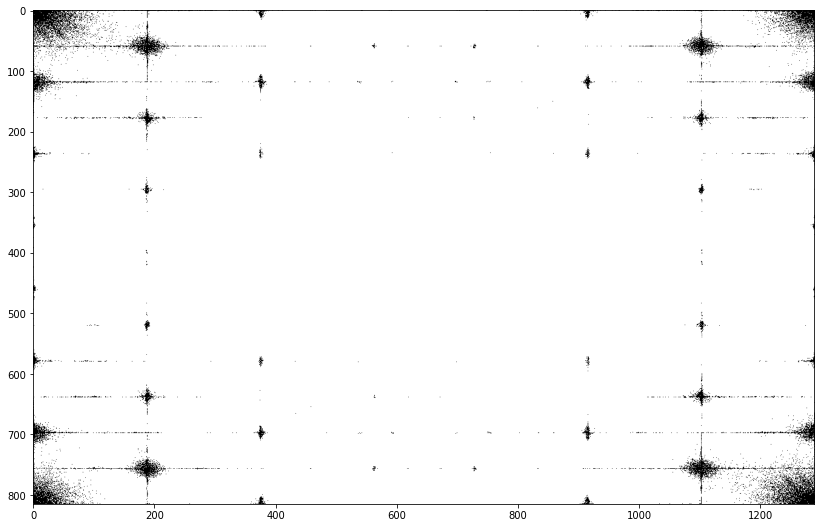

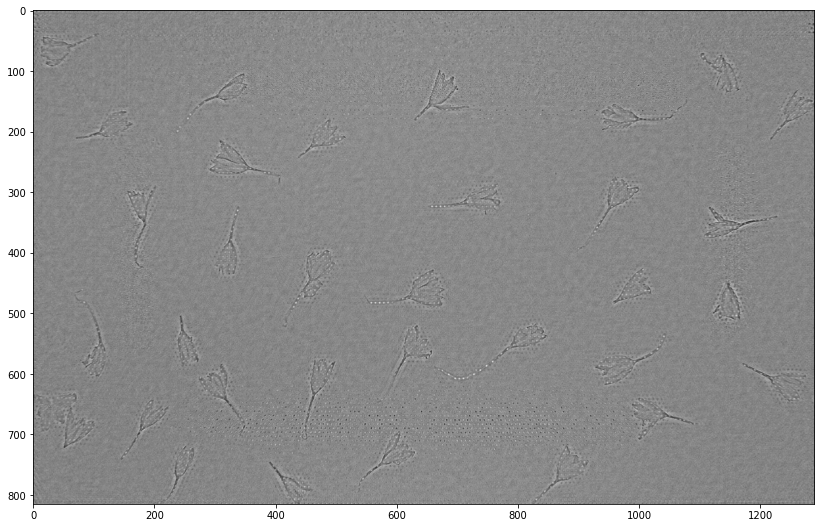

In [149]:
F = np.fft.fft2(image)
F_magnitude = np.abs(F) 
F_magnitude = np.fft.fftshift(F_magnitude)
K = 1
M,N = image.shape
F_magnitude[M // 2 - K: M // 2 + K, N // 2 - K: N // 2 + K] = 0
peaks1 = F_magnitude < np.percentile(F_magnitude, 98)
plt.figure(figsize=(14,16))
plt.imshow(peaks1,cmap='gray')
plt.show()
peaks1 = np.fft.ifftshift(peaks1)
plt.figure(figsize=(14,16))
plt.imshow(peaks1,cmap='gray')
plt.show()
F_dim1 = F.copy()
F_dim1 = F_dim1 * peaks1.astype(int)
denoised = np.real(np.fft.ifft2(F_dim1))
plt.figure(figsize=(14,16))
plt.imshow(denoised,cmap='gray')
plt.show()

In [123]:
denoised[200]

array([171.6370563 , 178.68294086, 174.21554881, ..., 132.80642501,
       146.89748919, 164.86378561])

B

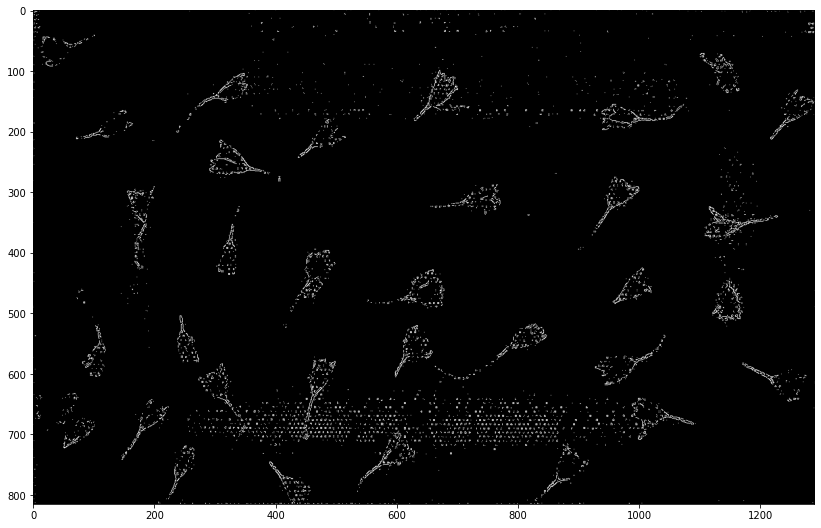

In [150]:
edge = cv.Canny(denoised.astype('uint8'),250,255)
plt.figure(figsize=(14,16))
plt.imshow(edge,cmap='gray')
plt.show()

C

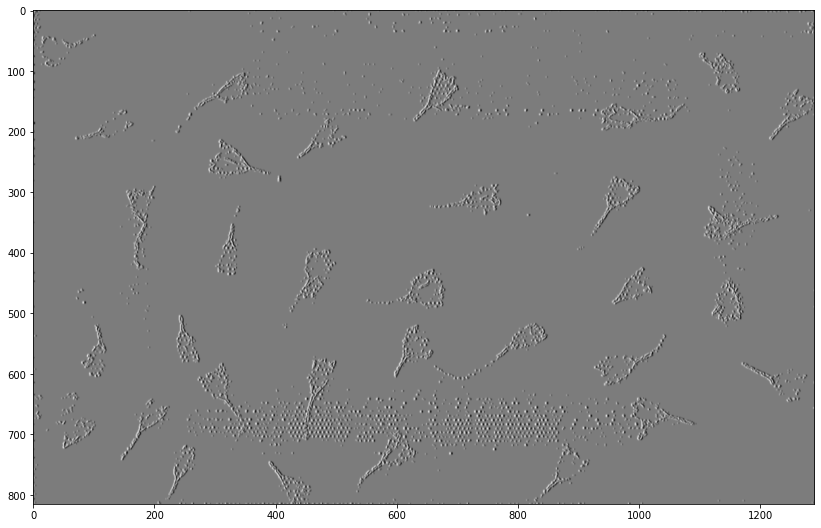

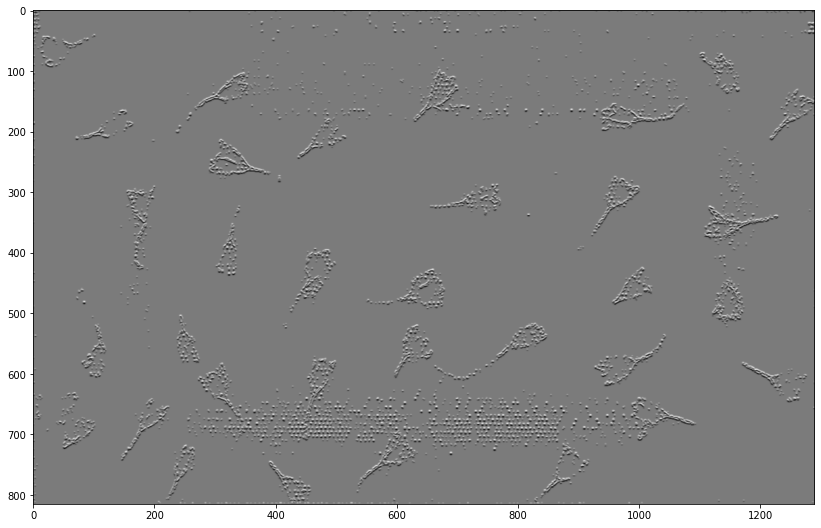

In [154]:
sobelx = cv.Sobel(edge,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(edge,cv.CV_64F,0,1,ksize=5)
plt.figure(figsize=(14,16))
plt.imshow(sobelx, cmap='gray')
plt.show()
plt.figure(figsize=(14,16))
plt.imshow(sobely, cmap='gray')
plt.show()
